./slurm_scripts/submit.sh  scripts/run_fineweb1B_adam_fista.sh param_configs/attn_fista_rho_mu_sweep.json small_fista  16

In [1]:
from sweep_utils import *

In [2]:
param_configs = "../param_configs/adamw_kq.json"
script_name = "../scripts/run_fineweb1B_adam.sh"
df, _ = load_sweep_jsons(param_configs, script_name)

param_configs = "../param_configs/adamw_kq_lr_larger.json"
df_larger_lr, _ = load_sweep_jsons(param_configs, script_name)

In [3]:
# fista_iter=100
param_configs = "../param_configs/attn_fista_rhomu_best1_lr_sweep.json"
script_name = "../scripts/run_fineweb1B_adam_fista.sh"
df_fista1, _ = load_sweep_jsons(param_configs, script_name)
df_fista1["model"] = "gpt-small-fista1"

# fista_iter=50, tuned on lr=0.003
param_configs = "../param_configs/attn_fista_rhomu_best2_lr_sweep.json" 
df_fista2, _ = load_sweep_jsons(param_configs, script_name)
df_fista2["model"] = "gpt-small-fista2"

# fista_iter=50
param_configs = "../param_configs/attn_fista_rhomu_best3_lr_sweep.json" 
df_fista3, _ = load_sweep_jsons(param_configs, script_name)
df_fista3["model"] = "gpt-small-fista3"

In [4]:
best_rho_over_lr = 10
best_mu_frac = 0.5
assert int(df_fista1["rho_over_lr"].unique()[0]) == best_rho_over_lr and df_fista1["rho_over_lr"].unique().size == 1
assert float(df_fista1["mu_frac"].unique()[0]) == best_mu_frac and df_fista1["mu_frac"].unique().size == 1

In [5]:
len(df)+len(df_fista1)+len(df_fista2)+len(df_fista3)

50

In [6]:
df = pd.concat([df, df_larger_lr, df_fista1, df_fista2, df_fista3], ignore_index=True)
len(df)

66

In [7]:
df[:3]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,lr,model,wd,attn_max_iter,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.373496,4.363170,4.363170,26.75,22.875,22.623992,0.0001,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.621689,4.611256,4.611256,50.00,50.000,49.957093,0.005,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.988099,3.978091,3.978091,49.00,36.500,36.477358,0.0005,gpt-small-softcap,0.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df[df["model"]=="gpt-small-default"][["lr", "min_val_loss"]].sort_values("min_val_loss")

,lr,min_val_loss
27,0.001,3.988897
23,0.0005,3.994627
21,0.0001,4.361649
24,5e-05,4.819427
26,1e-05,5.867361
22,0.005,6.774294
25,0.01,6.860291
42,0.1,6.869065
41,0.05,7.153021
40,0.5,114.613625


In [9]:
df[df["lr"]=='0.001'][["model", "min_val_loss", "kq_max", "lr"]]

,model,min_val_loss,kq_max,lr
6,gpt-small-softcap,3.993957,50.000,0.001
13,gpt-small-lnorm,3.949166,17.125,0.001
20,gpt-small-w-clip,3.981357,109.000,0.001
27,gpt-small-default,3.988897,318.000,0.001
44,gpt-small-fista1,3.985099,1296.000,0.001
51,gpt-small-fista2,4.133544,516.000,0.001
60,gpt-small-fista3,3.964075,1020.000,0.001


(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

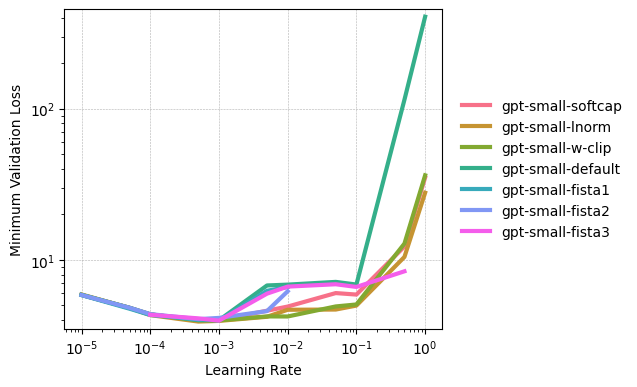

In [27]:
plot_lr_sweep_over_models(df, ycol="min_val_loss", ylog=True)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

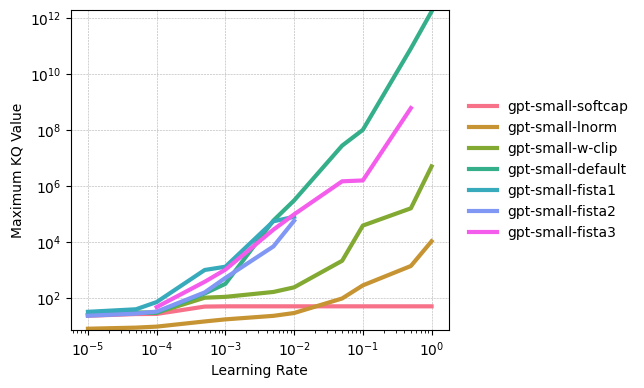

In [11]:
plot_lr_sweep_over_models(df, ycol="kq_max", ylog=True)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Mean KQ Value'>)

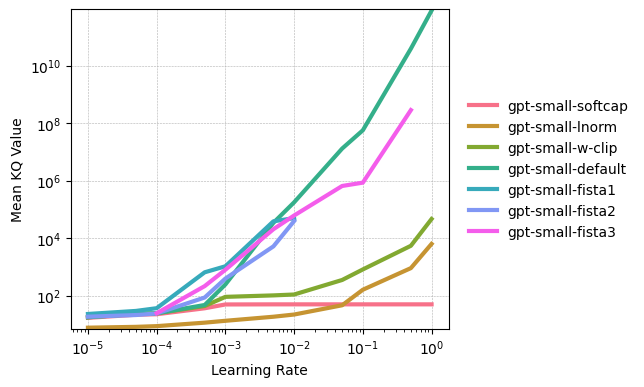

In [12]:
plot_lr_sweep_over_models(df, ycol="kq_mean", ylog=True)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Median KQ Value'>)

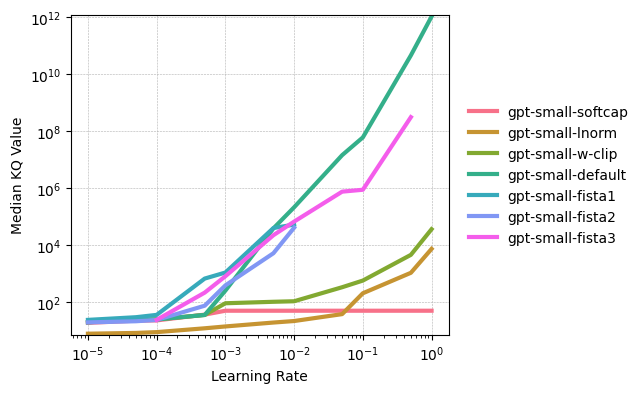

In [13]:
plot_lr_sweep_over_models(df, ycol="kq_median", ylog=True)

In [17]:
df[df["model"]=='gpt-small-w-clip'][["model", "fin_val_loss", "kq_max", "lr"]].sort_values("lr")

,model,fin_val_loss,kq_max,lr
14,gpt-small-w-clip,4.361649,29.625,0.0001
16,gpt-small-w-clip,3.994976,101.500,0.0005
20,gpt-small-w-clip,3.981357,109.000,0.001
15,gpt-small-w-clip,4.228341,163.000,0.005
18,gpt-small-w-clip,4.224507,238.000,0.01
37,gpt-small-w-clip,4.922021,2112.000,0.05
38,gpt-small-w-clip,5.071876,38144.000,0.1
36,gpt-small-w-clip,12.817272,157696.000,0.5
39,gpt-small-w-clip,36.241512,4947968.000,1.0
19,gpt-small-w-clip,5.867361,24.625,1e-05


In [18]:
df[df["model"]=='gpt-small-default'][["model", "fin_val_loss", "kq_max", "lr"]].sort_values("lr")

,model,fin_val_loss,kq_max,lr
21,gpt-small-default,4.361649,2.962500e+01,0.0001
23,gpt-small-default,3.994627,1.440000e+02,0.0005
27,gpt-small-default,3.988897,3.180000e+02,0.001
22,gpt-small-default,7.367841,5.785600e+04,0.005
25,gpt-small-default,7.443606,3.010560e+05,0.01
41,gpt-small-default,7.153021,2.726298e+07,0.05
42,gpt-small-default,6.869065,9.961472e+07,0.1
40,gpt-small-default,114.613625,7.999377e+10,0.5
43,gpt-small-default,405.718231,1.666447e+12,1.0
26,gpt-small-default,5.867361,2.462500e+01,1e-05
